In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


## Predicting the Severity of Covid-19 cases

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2//Covid-19/dataset.csv', na_values = missing_values)


In [ ]:
df.shape

(601, 66)

In [ ]:
df.head()

,Unnamed: 0,Size,Interval,Degree_Severe,Degree_Nonsevere,Age,Sex_F,Sex_M,Underlying_comorbidities_Hypertension,Underlying_comorbidities_Endocrine_disease,...,source,any_Underlying,any_Symptoms,CK,Troponin_I,O2%,consolidation_ratio%,ground_glass_opacity_ratio%,non_severe_to_severe_time,non_severe_to_severe
0,697,1,3.0,False,1,40.0,1.0,0.0,0.0,0.0,...,online,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0
1,698,1,NaN,False,1,74.0,1.0,0.0,0.0,0.0,...,online,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0
2,699,1,3.0,False,1,73.0,1.0,0.0,0.0,0.0,...,online,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0
3,700,1,1.0,True,0,66.0,1.0,0.0,1.0,0.0,...,online,True,True,NaN,NaN,NaN,NaN,NaN,NaN,0
4,701,1,1.0,True,0,67.0,0.0,1.0,0.0,0.0,...,online,False,True,NaN,NaN,NaN,NaN,NaN,NaN,0


|**Interval**|**Degree_Severity**|**age**|**Sex**|**any_Underlying**|**any_Symptoms**|**CK**|**Troponin_I**|**consolidation_ratio**|**ground_glass_opacity_ratio**|**non_severe_to_severe**|	
|-------|---------|---------|-------|--------|--------|----------|----------|----------|----------|----------|
|3.0|False|40.0|1|False|True|NaN|NaN|NaN|NaN|0|
|NaN.0|False|74.0|1|False|True|NaN|NaN|NaN|NaN|0|
|3.0|False|73.0|1|False|True|NaN|NaN|NaN|NaN|0|
|1.0|True|66.0|1|True|True|NaN|NaN|NaN|NaN|0|
|1.0|True|67.0|0|False|True|NaN|NaN|NaN|NaN|0|



In [ ]:
df=df.drop(['Unnamed: 0','Size'],axis=1)

In [ ]:
df.columns

Index(['Interval', 'Degree_Severe', 'Degree_Nonsevere', 'Age', 'Sex_F',
       'Sex_M', 'Underlying_comorbidities_Hypertension',
       'Underlying_comorbidities_Endocrine_disease',
       'Underlying_comorbidities_CVD',
       'Underlying_comorbidities_Chronic_Lung_disease',
       'Underlying_comorbidities_Digestive_Disease',
       'Underlying_comorbidities_Renal_disease',
       'Underlying_comorbidities_Tumor',
       'Underlying_comorbidities_Cerebrovascular/Nervous_Disease',
       'Underlying_comorbidities_Immune_disorder',
       'Underlying_comorbidities_Others', 'Symptoms_Fever', 'Symptoms_Cough',
       'Symptoms_Expectoration', 'Symptoms_Hemoptysis', 'Symptoms_Dyspnea',
       'Symptoms_Catarrh', 'Symptoms_Fatigue', 'Symptoms_Anorexia',
       'Symptoms_Nausea/Emesis', 'Symptoms_Myalgia',
       'Symptoms_Dizziness/Headache', 'Symptoms_Pharyngalgia',
       'Symptoms_Chest/back_pain', 'Symptoms_Chest_tightness',
       'Symptoms_Abdominal_pain/diarrhea', 'Temperature_High'

In [ ]:
L=list(df.columns)

In [ ]:
df.columns[df.isnull().any()]


Index(['Interval', 'Age', 'Sex_F', 'Sex_M',
       'Underlying_comorbidities_Hypertension',
       'Underlying_comorbidities_Endocrine_disease',
       'Underlying_comorbidities_CVD',
       'Underlying_comorbidities_Chronic_Lung_disease',
       'Underlying_comorbidities_Digestive_Disease',
       'Underlying_comorbidities_Renal_disease',
       'Underlying_comorbidities_Tumor',
       'Underlying_comorbidities_Cerebrovascular/Nervous_Disease',
       'Underlying_comorbidities_Immune_disorder',
       'Underlying_comorbidities_Others', 'Symptoms_Fever', 'Symptoms_Cough',
       'Symptoms_Expectoration', 'Symptoms_Hemoptysis', 'Symptoms_Dyspnea',
       'Symptoms_Catarrh', 'Symptoms_Fatigue', 'Symptoms_Anorexia',
       'Symptoms_Nausea/Emesis', 'Symptoms_Myalgia',
       'Symptoms_Dizziness/Headache', 'Symptoms_Pharyngalgia',
       'Symptoms_Chest/back_pain', 'Symptoms_Chest_tightness',
       'Symptoms_Abdominal_pain/diarrhea', 'Temperature_High',
       'Temperature_Moderate', 'Tem

Remove all columns with 30% of missing data

In [ ]:
L=[]
L_less=[]
for i in df.columns:
  if((df[i].isnull().sum())<(0.45*(df.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)



In [ ]:
list(L)

['Interval',
 'Degree_Severe',
 'Degree_Nonsevere',
 'Age',
 'Sex_F',
 'Sex_M',
 'Underlying_comorbidities_Hypertension',
 'Underlying_comorbidities_Endocrine_disease',
 'Underlying_comorbidities_CVD',
 'Underlying_comorbidities_Chronic_Lung_disease',
 'Underlying_comorbidities_Digestive_Disease',
 'Underlying_comorbidities_Renal_disease',
 'Underlying_comorbidities_Tumor',
 'Underlying_comorbidities_Cerebrovascular/Nervous_Disease',
 'Underlying_comorbidities_Immune_disorder',
 'Underlying_comorbidities_Others',
 'Symptoms_Fever',
 'Symptoms_Cough',
 'Symptoms_Dyspnea',
 'Symptoms_Fatigue',
 'Symptoms_Nausea/Emesis',
 'Symptoms_Myalgia',
 'Symptoms_Dizziness/Headache',
 'Laboratory_test_WBC',
 'Laboratory_test_L',
 'Laboratory_test_N',
 'Laboratory_test_CRP_(mg/L)',
 'Laboratory_test_CK_MB_(ng/ml)',
 'Laboratory_test_D_dimer_(ug/ml)',
 'Laboratory_test_ALT_(U/L)',
 'Laboratory_test_AST_(U/L)',
 'Laboratory_test_TB_(umol/L)',
 'Laboratory_test_ALB_(g/L)',
 'Laboratory_test_LDH_(U/L)',


In [ ]:
list(L_less)

['Symptoms_Expectoration',
 'Symptoms_Hemoptysis',
 'Symptoms_Catarrh',
 'Symptoms_Anorexia',
 'Symptoms_Pharyngalgia',
 'Symptoms_Chest/back_pain',
 'Symptoms_Chest_tightness',
 'Symptoms_Abdominal_pain/diarrhea',
 'Temperature_High',
 'Temperature_Moderate',
 'Temperature_Low',
 'Laboratory_test_ESR_(mm/hr)',
 'Laboratory_test_PCT_(ng/ml)',
 'Laboratory_test_HTI_(pg/ml)',
 'Laboratory_test_BUN_(mmol/L)',
 'Laboratory_test_PT_(s)',
 'Laboratory_test_Lac_(mmol/L)',
 'Laboratory_test_IL_6_(pg/ml)',
 'Laboratory_test_Lymphopenia',
 'Troponin_I',
 'O2%',
 'consolidation_ratio%',
 'ground_glass_opacity_ratio%',
 'non_severe_to_severe_time']

In [ ]:
len(L_less)

24

In [ ]:
df[L].head()

,Interval,Degree_Severe,Degree_Nonsevere,Age,Sex_F,Sex_M,Underlying_comorbidities_Hypertension,Underlying_comorbidities_Endocrine_disease,Underlying_comorbidities_CVD,Underlying_comorbidities_Chronic_Lung_disease,...,Laboratory_test_AST_(U/L),Laboratory_test_TB_(umol/L),Laboratory_test_ALB_(g/L),Laboratory_test_LDH_(U/L),Laboratory_test_SCr_(umol/L),source,any_Underlying,any_Symptoms,CK,non_severe_to_severe
0,3.0,False,1,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,online,False,True,NaN,0
1,NaN,False,1,74.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,online,False,True,NaN,0
2,3.0,False,1,73.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,online,False,True,NaN,0
3,1.0,True,0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,online,True,True,NaN,0
4,1.0,True,0,67.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,online,False,True,NaN,0


In [ ]:
df[L].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 40 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Interval                                                  489 non-null    float64
 1   Degree_Severe                                             601 non-null    bool   
 2   Degree_Nonsevere                                          601 non-null    int64  
 3   Age                                                       599 non-null    float64
 4   Sex_F                                                     599 non-null    float64
 5   Sex_M                                                     599 non-null    float64
 6   Underlying_comorbidities_Hypertension                     478 non-null    float64
 7   Underlying_comorbidities_Endocrine_disease                478 non-null    float64
 8   Underlying_comorbidi

In [ ]:
df=df[L]

In [ ]:
import numpy as np

In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
numeric_data.shape

(601, 36)

In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
boolean=df.select_dtypes(include = ['bool'])


In [ ]:
boolean.shape

(601, 3)

In [ ]:
non_numeric=pd.concat([non_numeric,boolean], axis=1)

In [ ]:
non_numeric.shape

(601, 4)

# Imputation Methods

Using a multivariate imputation method to deal with missing values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit(numeric_data)

IterativeImputer(random_state=0)

In [ ]:
imputed_numeric=np.round(imp.transform(numeric_data))

In [ ]:
imputed_numeric.shape

(601, 36)

In [ ]:
num_df=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

Using a Univariate(Median) imputation method to deal with missing values

In [ ]:
from sklearn.impute import SimpleImputer
i = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
i.fit(numeric_data)

SimpleImputer(strategy='median')

In [ ]:
simple_imputed=np.round(i.transform(numeric_data))

In [ ]:
simple_imputed_df=pd.DataFrame(simple_imputed, columns=numeric_data.columns)

Using a Regression approach to predict missing values in numeric_data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
imp_mean = IterativeImputer(estimator=xgb.XGBRegressor(), random_state=0)
imp_mean.fit(numeric_data)
regressor_imputed_df=pd.DataFrame(imp_mean.transform(numeric_data))

[09:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:24:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
num_df.head()

,Interval,Degree_Nonsevere,Age,Sex_F,Sex_M,Underlying_comorbidities_Hypertension,Underlying_comorbidities_Endocrine_disease,Underlying_comorbidities_CVD,Underlying_comorbidities_Chronic_Lung_disease,Underlying_comorbidities_Digestive_Disease,...,Laboratory_test_CK_MB_(ng/ml),Laboratory_test_D_dimer_(ug/ml),Laboratory_test_ALT_(U/L),Laboratory_test_AST_(U/L),Laboratory_test_TB_(umol/L),Laboratory_test_ALB_(g/L),Laboratory_test_LDH_(U/L),Laboratory_test_SCr_(umol/L),CK,non_severe_to_severe
0,3.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,66.0,25.0,28.0,14.0,40.0,214.0,62.0,112.0,0.0
1,6.0,1.0,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,104.0,24.0,34.0,14.0,38.0,266.0,64.0,131.0,0.0
2,3.0,1.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,103.0,24.0,34.0,14.0,38.0,264.0,64.0,131.0,0.0
3,1.0,0.0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,14.0,98.0,25.0,32.0,14.0,38.0,258.0,64.0,127.0,0.0
4,1.0,0.0,67.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14.0,99.0,25.0,33.0,14.0,38.0,260.0,64.0,128.0,0.0


In [ ]:
numeric_data.head()

,Interval,Degree_Nonsevere,Age,Sex_F,Sex_M,Underlying_comorbidities_Hypertension,Underlying_comorbidities_Endocrine_disease,Underlying_comorbidities_CVD,Underlying_comorbidities_Chronic_Lung_disease,Underlying_comorbidities_Digestive_Disease,...,Laboratory_test_CK_MB_(ng/ml),Laboratory_test_D_dimer_(ug/ml),Laboratory_test_ALT_(U/L),Laboratory_test_AST_(U/L),Laboratory_test_TB_(umol/L),Laboratory_test_ALB_(g/L),Laboratory_test_LDH_(U/L),Laboratory_test_SCr_(umol/L),CK,non_severe_to_severe
0,3.0,1,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,1,74.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3.0,1,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.0,0,66.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.0,0,67.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
numeric_data['Interval'].isnull().sum()

112

In [ ]:
num_df['Interval'].isnull().sum()

0

In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          601 non-null    object
 1   Degree_Severe   601 non-null    bool  
 2   any_Underlying  601 non-null    bool  
 3   any_Symptoms    601 non-null    bool  
dtypes: bool(3), object(1)
memory usage: 6.6+ KB


In [ ]:
non_numeric['source'].head()

0    online
1    online
2    online
3    online
4    online
Name: source, dtype: object

In [ ]:
non_numeric.head(2)

,source,Degree_Severe,any_Underlying,any_Symptoms
0,online,False,False,True
1,online,False,False,True


Dealing with missing values in the non numeric data

In [ ]:
non_numeric=non_numeric.fillna(method="pad", limit=1)

In [ ]:
non_numeric=non_numeric.fillna(method="bfill", limit=1)

In [ ]:
non_numeric.head(1)

,source,Degree_Severe,any_Underlying,any_Symptoms
0,online,False,False,True


In [ ]:
non_numeric['Degree_Severe'],_=pd.factorize(non_numeric['Degree_Severe'])

In [ ]:
source=pd.get_dummies(non_numeric['source'], prefix='source')
any_Underlying=pd.get_dummies(non_numeric['any_Underlying'], prefix='any_Underlying')
any_Symptoms=pd.get_dummies(non_numeric['any_Symptoms'], prefix='any_Symptoms')


In [ ]:
objects=pd.concat([source,any_Underlying,any_Symptoms,non_numeric['Degree_Severe']], axis=1)

In [ ]:
objects.head()

,source_guizhou,source_guizhou_update,source_online,any_Underlying_False,any_Underlying_True,any_Symptoms_False,any_Symptoms_True,Degree_Severe
0,0,0,1,1,0,0,1,0
1,0,0,1,1,0,0,1,0
2,0,0,1,1,0,0,1,0
3,0,0,1,0,1,0,1,1
4,0,0,1,1,0,0,1,1


In [ ]:
objects.shape

(601, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler


## Joining and Scaling Data Imputed by The Regressor model

In [ ]:
regressor_scaled=StandardScaler().fit_transform(regressor_imputed_df)

In [ ]:
regressor_scaled.shape

(601, 36)

In [ ]:
numeric_data.shape

(601, 36)

In [ ]:
regressor_imputed_df=pd.DataFrame(regressor_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([regressor_imputed_df,objects], axis=1)


In [ ]:
corr_matrix = data.corr(method='pearson')


In [ ]:
corr_matrix["Degree_Severe"].sort_values(ascending=False).head(20)

Degree_Severe                                    1.000000
non_severe_to_severe                             0.500605
Laboratory_test_CRP_(mg/L)                       0.345249
Age                                              0.297767
Laboratory_test_LDH_(U/L)                        0.258064
Laboratory_test_AST_(U/L)                        0.247231
source_guizhou                                   0.212176
Symptoms_Dyspnea                                 0.208016
Symptoms_Fatigue                                 0.197952
CK                                               0.185188
Symptoms_Cough                                   0.154791
any_Underlying_True                              0.153503
Laboratory_test_ALT_(U/L)                        0.150271
Laboratory_test_N                                0.149769
Symptoms_Nausea/Emesis                           0.124355
Laboratory_test_CK_MB_(ng/ml)                    0.114439
Underlying_comorbidities_Others                  0.104255
Underlying_com

In [ ]:
corr_matrix["Degree_Severe"].sort_values(ascending=False).tail(20)

Sex_M                                                       0.061898
Laboratory_test_D_dimer_(ug/ml)                             0.058325
Underlying_comorbidities_CVD                                0.056617
source_online                                               0.056188
Symptoms_Dizziness/Headache                                 0.056035
Symptoms_Fever                                              0.048528
Underlying_comorbidities_Renal_disease                      0.042148
Underlying_comorbidities_Hypertension                       0.033504
Interval                                                    0.015317
Underlying_comorbidities_Cerebrovascular/Nervous_Disease    0.003302
Laboratory_test_TB_(umol/L)                                -0.004052
Underlying_comorbidities_Immune_disorder                   -0.005638
Laboratory_test_WBC                                        -0.014256
Sex_F                                                      -0.067645
any_Symptoms_True                 

In [ ]:
data=data.drop('Degree_Nonsevere',axis=1)

In [ ]:
data.shape

(601, 43)

In [ ]:
y=data['Degree_Severe']

In [ ]:
X=data.iloc[:,:-1]

## Reducing Dimensionality of X Imputed by Regressor Model

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC


In [ ]:
X.shape

(601, 42)

The following code computes PCA without reducing dimensionality, then computes the minimum
number of dimensions required to preserve 95% of the training set’s variance:

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
X_reduced.shape

(601, 31)

Features selected by PCA from the initial number of features

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
selected_features=list(df.iloc[:,1])

In [ ]:
pca.n_components_


31

In [ ]:
selected_features

['Laboratory_test_AST_(U/L)',
 'Sex_M',
 'Underlying_comorbidities_Renal_disease',
 'Symptoms_Fever',
 'Underlying_comorbidities_Renal_disease',
 'Laboratory_test_N',
 'Underlying_comorbidities_Digestive_Disease',
 'Symptoms_Cough',
 'Symptoms_Nausea/Emesis',
 'Symptoms_Myalgia',
 'Underlying_comorbidities_Cerebrovascular/Nervous_Disease',
 'Symptoms_Fatigue',
 'Symptoms_Dizziness/Headache',
 'Laboratory_test_D_dimer_(ug/ml)',
 'Interval',
 'Laboratory_test_WBC',
 'Laboratory_test_WBC',
 'Symptoms_Dizziness/Headache',
 'Underlying_comorbidities_Tumor',
 'Laboratory_test_ALB_(g/L)',
 'Laboratory_test_L',
 'Underlying_comorbidities_Others',
 'Symptoms_Fatigue',
 'Underlying_comorbidities_CVD',
 'Symptoms_Fatigue',
 'Laboratory_test_SCr_(umol/L)',
 'Age',
 'Laboratory_test_TB_(umol/L)',
 'CK',
 'Underlying_comorbidities_Hypertension',
 'Laboratory_test_CRP_(mg/L)']

Training Models with PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
batch_size = 128
num_classes = 1
epochs = 50

In [ ]:
# model = Sequential()
# model.add(Dense(33, activation='relu', input_dim=(31)))
# model.add(Dense(35, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# model.summary()


In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])



In [ ]:
# # history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# y_pred=np.round(model.predict(Xtest)).ravel()
# print("\nCR by library method=\n",
#           classification_report(Ytest, y_pred))

In [ ]:
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 
# MLP_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/PCA_Without_Cross_Validation/MLP_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       113
           1       0.86      0.50      0.63        38

    accuracy                           0.85       151
   macro avg       0.86      0.74      0.77       151
weighted avg       0.86      0.85      0.84       151



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, y_pred, labels=[0,1])

array([[110,   3],
       [ 19,  19]])

In [ ]:
MLP_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Regressor_imputed_PCA_Non_Cross_accuracy

0.85

In [ ]:
import xgboost as xgb


In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# y_pred=np.round(model.predict(Xtest)).ravel()
# print("\nCR by library method=\n",
#           classification_report(Ytest, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/PCA_Without_Cross_Validation/XGB_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
XGB_Regressor_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGB_Regressor_imputed_PCA_Non_Cross_accuracy

0.83

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       113
           1       0.81      0.45      0.58        38

    accuracy                           0.83       151
   macro avg       0.82      0.71      0.74       151
weighted avg       0.83      0.83      0.82       151



In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/PCA_Without_Cross_Validation/SVM_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       113
           1       0.93      0.37      0.53        38

    accuracy                           0.83       151
   macro avg       0.88      0.68      0.71       151
weighted avg       0.85      0.83      0.81       151



In [ ]:
SVC_Regressor_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_accuracy

0.83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


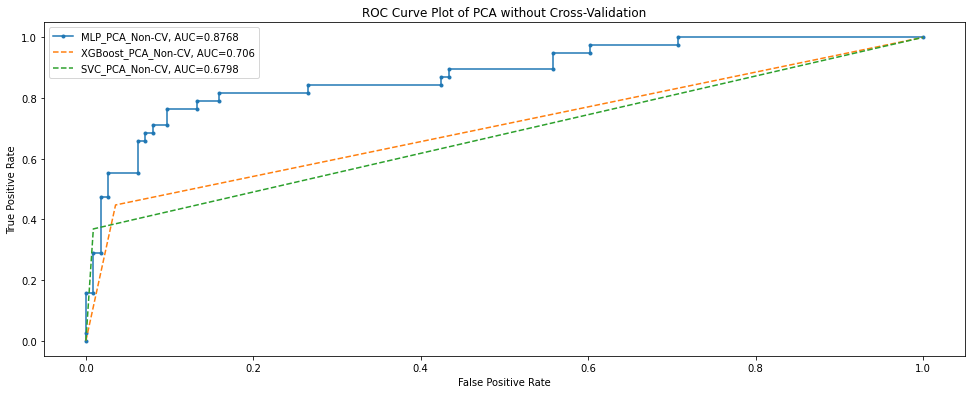

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross-Validation")
plt.legend()

## Training Models with PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(31)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.4101403057575226; accuracy of 85.57214140892029%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4234808385372162; accuracy of 83.49999785423279%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3809076249599457; accuracy of 82.99999833106995%

CR by library method=
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       144
           1       0.72      0.64      0.68        56

    accuracy                           0.83       200
   macro avg       0.79      0.77      0.78       200
weighted avg       0.83      0.83      0.83       200



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       144
           1       0.82      0.73      0.77        56

    accuracy                           0.88       200
   macro avg       0.86      0.83      0.85       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
MLP_Regressor_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)
MLP_Regressor_imputed_PCA_Cross_Validation_AUC

0.8348214285714286

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       113
           1       0.76      0.50      0.60        38

    accuracy                           0.83       151
   macro avg       0.80      0.72      0.75       151
weighted avg       0.83      0.83      0.82       151



In [ ]:
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy

0.83

Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       113
           1       0.86      0.47      0.61        38

    accuracy                           0.85       151
   macro avg       0.85      0.72      0.76       151
weighted avg       0.85      0.85      0.83       151



In [ ]:
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_PCA_Cross_Validation_accuracy

0.85

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


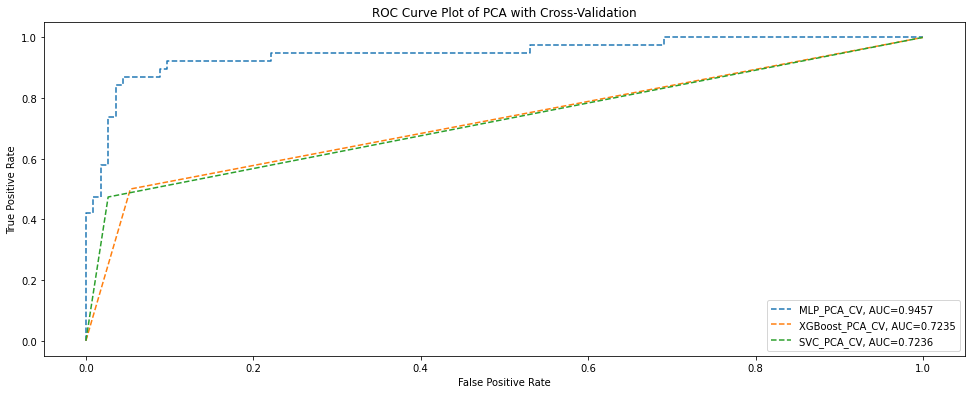

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross-Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Regressor Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(44, activation='relu', input_dim=(42)))
# m.add(Dense(46, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       113
           1       0.83      0.50      0.62        38

    accuracy                           0.85       151
   macro avg       0.84      0.73      0.76       151
weighted avg       0.85      0.85      0.83       151



In [ ]:
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.85

XGB boost without K-fold cross validation


In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(Xtrain, Ytrain)
# y_pred=full_boost.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       113
           1       0.93      0.68      0.79        38

    accuracy                           0.91       151
   macro avg       0.92      0.83      0.86       151
weighted avg       0.91      0.91      0.90       151



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.91

Support Vector Machine with cross validation

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       113
           1       0.93      0.34      0.50        38

    accuracy                           0.83       151
   macro avg       0.87      0.67      0.70       151
weighted avg       0.85      0.83      0.80       151



In [ ]:
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Non_Cross_accuracy

0.83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


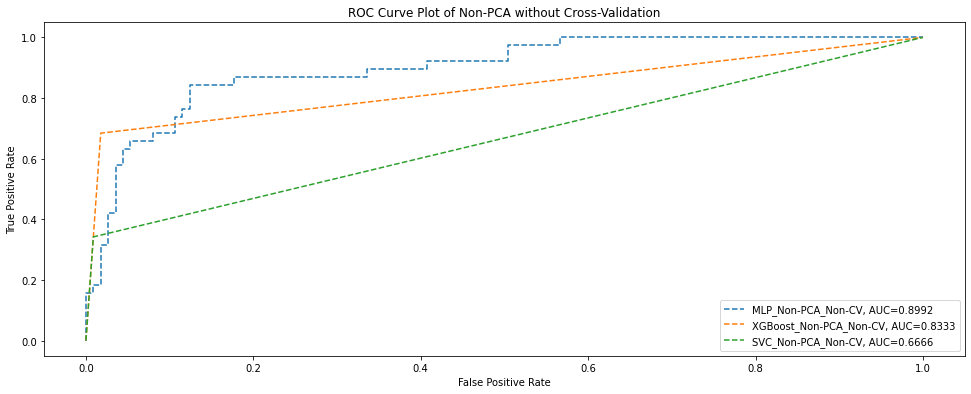

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross-Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Regressor Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(42)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.41414567828178406; accuracy of 84.57711338996887%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.4079505205154419; accuracy of 84.50000286102295%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.42550456523895264; accuracy of 84.50000286102295%

CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       157
           1       0.65      0.60      0.63        43

    accuracy                           0.84       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       157
           1       0.91      0.67      0.77        43

    accuracy                           0.92       200
   macro avg       0.91      0.83      0.86       200
weighted avg       0.91      0.92      0.91       200



In [ ]:
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.92

XGB boost with K-fold cross validation

In [ ]:
# cv = KFold(n_splits=2)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       113
           1       0.95      0.47      0.63        38

    accuracy                           0.86       151
   macro avg       0.90      0.73      0.77       151
weighted avg       0.87      0.86      0.84       151



In [ ]:
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.86

Support Vector Machine with cross validation

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Regressor/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       113
           1       0.83      0.39      0.54        38

    accuracy                           0.83       151
   macro avg       0.83      0.68      0.72       151
weighted avg       0.83      0.83      0.80       151



In [ ]:
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Regressor_imputed_Non_PCA_Cross_Validation_accuracy

0.83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


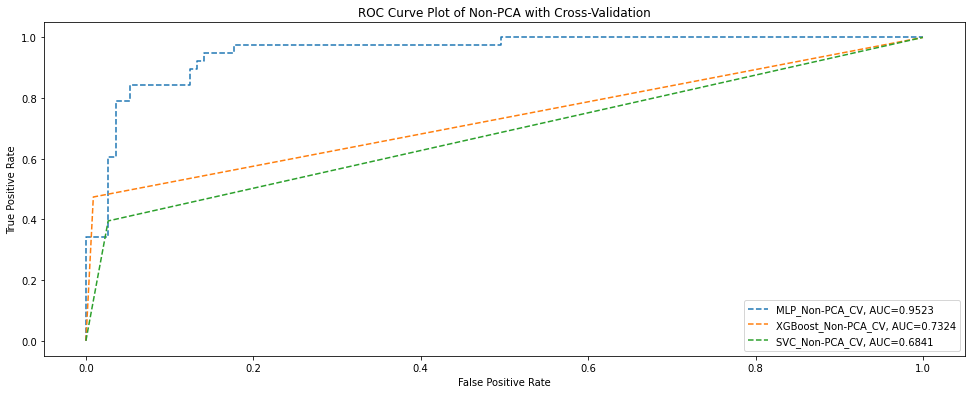

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross-Validation")
plt.legend()

### Joining and Scaling Data Imputed by the Multivariate Imputation method


In [ ]:
num_df=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)
multivariate_scaled=StandardScaler().fit_transform(num_df)
multivariate_imputed_df=pd.DataFrame(multivariate_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([multivariate_imputed_df,objects], axis=1)


In [ ]:
y=data['Degree_Severe']
X=data.iloc[:,:-1]

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(601, 31)

## Training Models with PCA X Imputed by Multivariate Method and without Cross Validation

In [ ]:
# model = Sequential()
# model.add(Dense(33, activation='relu', input_dim=(31)))
# model.add(Dense(35, activation='relu'))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dense(64, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       113
           1       0.97      0.97      0.97        38

    accuracy                           0.99       151
   macro avg       0.98      0.98      0.98       151
weighted avg       0.99      0.99      0.99       151



In [ ]:
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_PCA_Non_Cross_accuracy

0.99

In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, y_pred, labels=[0,1])

array([[112,   1],
       [  1,  37]])

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.97      0.92      0.95        38

    accuracy                           0.97       151
   macro avg       0.97      0.96      0.96       151
weighted avg       0.97      0.97      0.97       151



In [ ]:
XGBoost_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_accuracy

0.97

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       1.00      0.84      0.91        38

    accuracy                           0.96       151
   macro avg       0.97      0.92      0.94       151
weighted avg       0.96      0.96      0.96       151



In [ ]:
SVC_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_accuracy

0.96

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


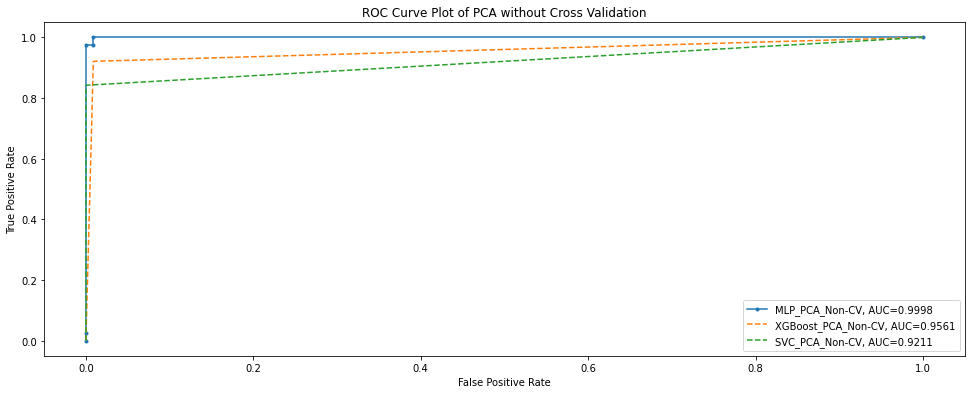

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(31)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.08253136277198792; accuracy of 97.0149278640747%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.17285673320293427; accuracy of 98.00000190734863%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.21451009809970856; accuracy of 96.49999737739563%

CR by library method=
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       146
           1       0.98      0.89      0.93        54

    accuracy                           0.96       200
   macro avg       0.97      0.94      0.95       200
weighted avg       0.97      0.96      0.96       200



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       146
           1       1.00      0.96      0.98        54

    accuracy                           0.99       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.99      0.99       200



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.99

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.87      0.93        38

    accuracy                           0.97       151
   macro avg       0.98      0.93      0.95       151
weighted avg       0.97      0.97      0.97       151



In [ ]:
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy

0.97

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy

1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


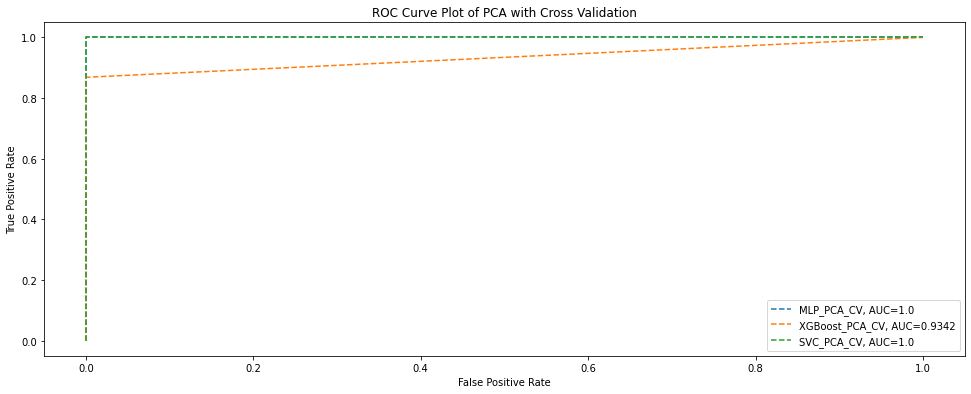

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

## Training Models with Non-PCA X Imputed by Multivariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
# m = Sequential()
# m.add(Dense(44, activation='relu', input_dim=(43)))
# m.add(Dense(46, activation='relu'))
# # m.add(Dense(128, activation='relu'))
# # m.add(Dense(64, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       113
           1       1.00      0.97      0.99        38

    accuracy                           0.99       151
   macro avg       1.00      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.99

In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(Xtrain, Ytrain)
# y_pred=full_boost.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

1.0

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.87      0.93        38

    accuracy                           0.97       151
   macro avg       0.98      0.93      0.95       151
weighted avg       0.97      0.97      0.97       151



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy

0.97

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


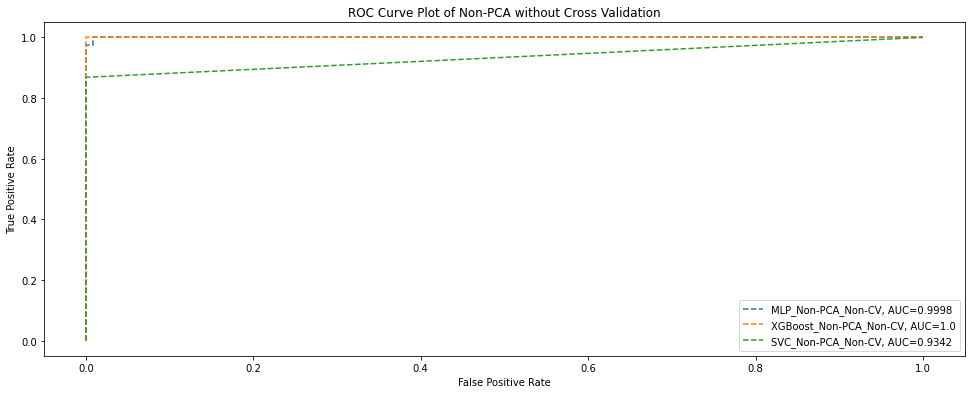

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

### Training Models with Non-PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(43)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.17665238678455353; accuracy of 97.0149278640747%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.02998773381114006; accuracy of 99.00000095367432%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.07011710852384567; accuracy of 98.00000190734863%

CR by library method=
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.96      0.96      0.96        47

    accuracy                           0.98       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.98      0.98       200



In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

1.0

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

1.0

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Multivariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy

1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


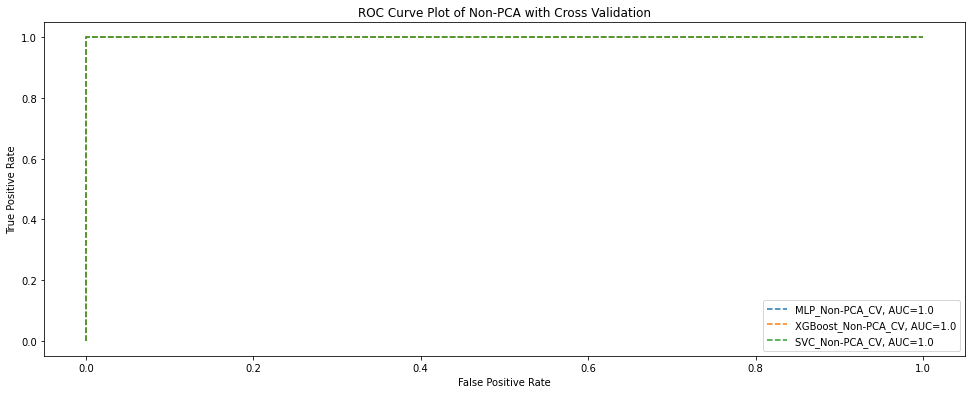

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()

# Joining and Scaling Data Imputed by the Univariate Imputation method

In [ ]:
univariate_scaled=StandardScaler().fit_transform(simple_imputed_df)
univariate_imputed_df=pd.DataFrame(univariate_scaled, columns=numeric_data.columns)

In [ ]:
data=pd.concat([univariate_imputed_df,objects], axis=1)
y=data['Degree_Severe']
X=data.iloc[:,:-1]

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
X_reduced.shape

(601, 32)

### Training Models with PCA X Imputed by Univariate Model and without Cross Validation



In [ ]:
model = Sequential()
model.add(Dense(33, activation='relu', input_dim=(32)))
model.add(Dense(35, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=model.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

5/5 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9868
Accuracy: 98.68 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://811972a6-13d6-4911-b6ac-b60ae5102b32/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/PCA_Without_Cross_Validation/MLP_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.95      0.97        38

    accuracy                           0.99       151
   macro avg       0.99      0.97      0.98       151
weighted avg       0.99      0.99      0.99       151



In [ ]:
MLP_Univariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_PCA_Non_Cross_accuracy

0.99

In [ ]:
model=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(Xtrain, Ytrain)
y_pred=model.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 96.03 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/PCA_Without_Cross_Validation/XGB_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       113
           1       0.97      0.87      0.92        38

    accuracy                           0.96       151
   macro avg       0.96      0.93      0.95       151
weighted avg       0.96      0.96      0.96       151



In [ ]:
XGBoost_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_accuracy

0.96

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 96.03 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/PCA_Without_Cross_Validation/SVM_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       1.00      0.84      0.91        38

    accuracy                           0.96       151
   macro avg       0.97      0.92      0.94       151
weighted avg       0.96      0.96      0.96       151



In [ ]:
SVC_Univariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_accuracy

0.96

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


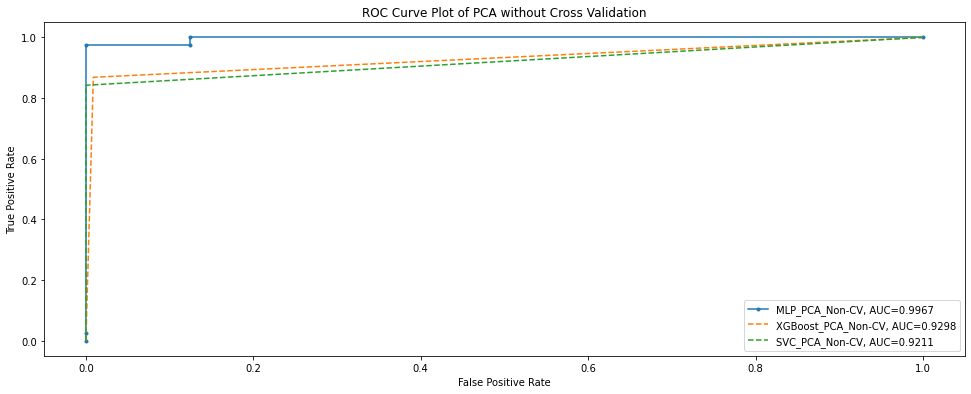

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA without Cross Validation")
plt.legend()

## Training Models with PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(32)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.02602926827967167; accuracy of 99.00497794151306%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.32660937309265137; accuracy of 96.49999737739563%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.08011147379875183; accuracy of 97.00000286102295%

CR by library method=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       154
           1       0.98      0.89      0.93        46

    accuracy                           0.97       200
   macro avg       0.97      0.94      0.96       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://095b4f1b-1674-4b63-b3f2-e0aecb37eb11/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/PCA_Cross_Validation/MLP_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       154
           1       0.98      0.89      0.93        46

    accuracy                           0.97       200
   macro avg       0.97      0.94      0.96       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Univariate_imputed_PCA_Cross_Validation_accuracy

0.97

In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100,500,1000]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 94.04 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/PCA_Cross_Validation/XGB_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       113
           1       0.94      0.82      0.87        38

    accuracy                           0.94       151
   macro avg       0.94      0.90      0.92       151
weighted avg       0.94      0.94      0.94       151



In [ ]:
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_PCA_Cross_Validation_accuracy

0.94

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 100.00 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/PCA_Cross_Validation/SVM_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_PCA_Cross_Validation_accuracy

1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


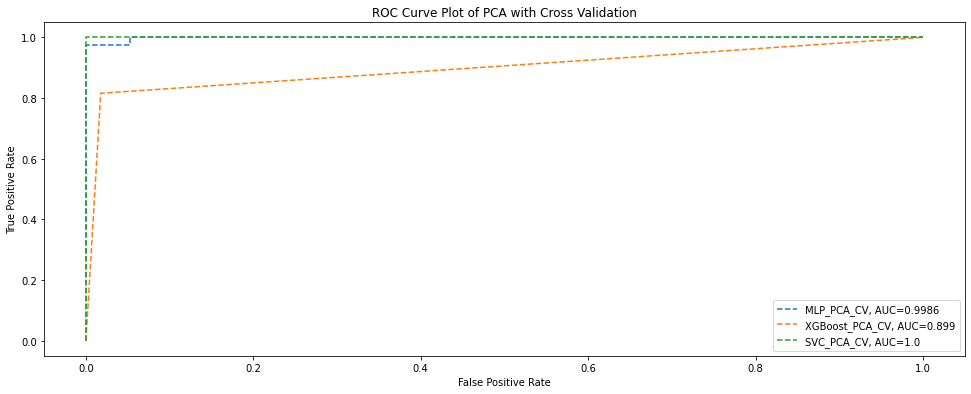

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of PCA with Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
m = Sequential()
m.add(Dense(1024, activation='relu', input_dim=(43)))
m.add(Dense(256, activation='relu'))
m.add(Dense(128, activation='relu'))
m.add(Dense(64, activation='relu'))
m.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
m.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
                    validation_data=(Xtest, Ytest))

In [ ]:
loss,accuracy=m.evaluate(Xtest,Ytest)
print("Accuracy: %.2f"%(accuracy*100),"%")

5/5 [==============================] - 0s 4ms/step - loss: 0.0605 - accuracy: 0.9868
Accuracy: 98.68 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(m, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://defe6be7-897e-4a59-87f6-22a7dabc6aa8/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/Non_PCA_Without_Cross_Validation/MLP_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       113
           1       1.00      0.95      0.97        38

    accuracy                           0.99       151
   macro avg       0.99      0.97      0.98       151
weighted avg       0.99      0.99      0.99       151



In [ ]:
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
MLP_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.99

In [ ]:
full_boost=xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
full_boost.fit(Xtrain, Ytrain)
y_pred=full_boost.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 100.00 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav' 
pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/Non_PCA_Without_Cross_Validation/XGB_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Non_Cross_accuracy

1.0

In [ ]:
clf=SVC()
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 96.69 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/Non_PCA_Without_Cross_Validation/SVM_Non_PCA_Without_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.87      0.93        38

    accuracy                           0.97       151
   macro avg       0.98      0.93      0.95       151
weighted avg       0.97      0.97      0.97       151



In [ ]:
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Non_Cross_accuracy

0.97

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


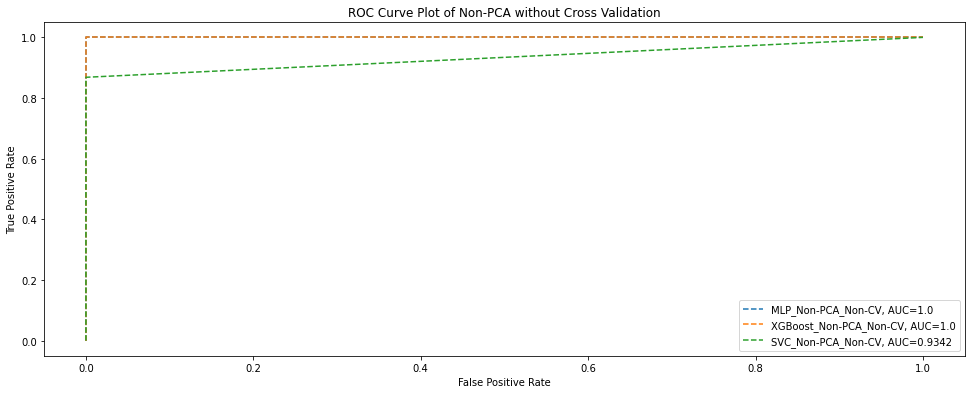

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA without Cross Validation")
plt.legend()

# Training Models with Non-PCA X Imputed by Univariate Model and with Cross Validation

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(33, activation='relu', input_dim=(43)))
  model.add(Dense(35, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1
y_pred=np.round(model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.01723809540271759; accuracy of 99.50248599052429%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.18235859274864197; accuracy of 96.49999737739563%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.17146769165992737; accuracy of 95.99999785423279%

CR by library method=
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       147
           1       0.88      0.98      0.93        53

    accuracy                           0.96       200
   macro avg       0.94      0.97      0.95       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav'
pickle.dump(model, open(filename, 'wb')) 


INFO:tensorflow:Assets written to: ram://d122a56a-bffe-46cb-9782-690e5e48be44/assets


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/MLP/Non_PCA_Cross_Validation/MLP_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       147
           1       0.88      0.98      0.93        53

    accuracy                           0.96       200
   macro avg       0.94      0.97      0.95       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
MLP_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])
MLP_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

0.96

In [ ]:
cv = KFold(n_splits=3)
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2,5, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100,500,1000]}
full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
y_pred=model_gs.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 100.00 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav'
pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/XGB/Non_PCA_Cross_Validation/XGB_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
XGBoost_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

1.0

In [ ]:
tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
                       scoring='accuracy')
clf.fit(Xtrain,Ytrain)
y_pred=clf.predict(Xtest)
print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 100.00 %


In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav'
pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-2/models/1-exp/Univariate/SVM/Non_PCA_Cross_Validation/SVM_Non_PCA_Cross_Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        38

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])
SVC_Univariate_imputed_Non_PCA_Cross_Validation_accuracy

1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


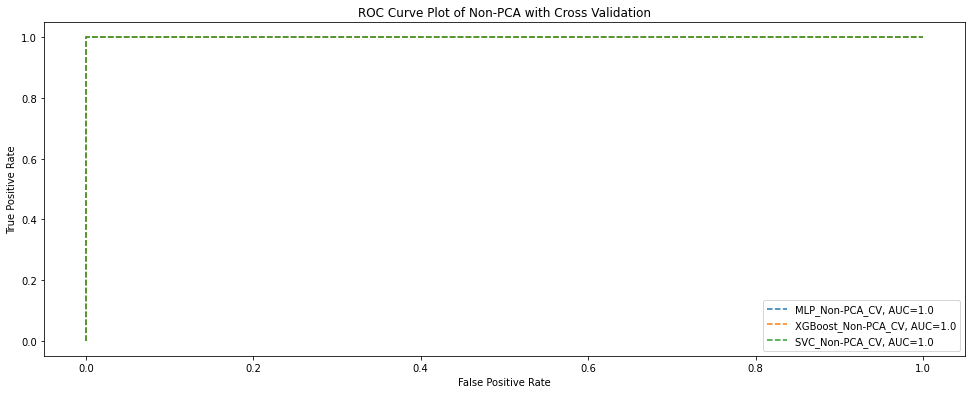

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot of Non-PCA with Cross Validation")
plt.legend()